# IPL Win Prediction

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

### Read Data from the File

In [2]:
data= pd.read_csv("matchesdata.csv")

### Check Data Format

In [3]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/08,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/08,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/08,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/08,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
data.describe()

,id,neutral_venue,result_margin
count,8.170000e+02,817.000000,800.000000
mean,7.569381e+05,0.094247,17.308750
std,3.061693e+05,0.292351,22.057631
min,3.359820e+05,0.000000,1.000000
25%,5.012280e+05,0.000000,6.000000
50%,7.292990e+05,0.000000,8.000000
75%,1.082627e+06,0.000000,19.250000
max,1.237182e+06,1.000000,146.000000


### Checking for Null Values in the Data

In [5]:
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             798
umpire1              0
umpire2              0
dtype: int64

### Drop Columns with no Data
#### Method column is almost null, so drop method column

In [6]:
data.drop('method', axis=1, inplace=True)

In [7]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,4/18/08,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,4/19/08,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/08,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/08,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [8]:
data.describe()

,id,neutral_venue,result_margin
count,8.170000e+02,817.000000,800.000000
mean,7.569381e+05,0.094247,17.308750
std,3.061693e+05,0.292351,22.057631
min,3.359820e+05,0.000000,1.000000
25%,5.012280e+05,0.000000,6.000000
50%,7.292990e+05,0.000000,8.000000
75%,1.082627e+06,0.000000,19.250000
max,1.237182e+06,1.000000,146.000000


In [9]:
data.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [10]:
data=data[~data['result_margin'].isnull()]
data=data[~data['city'].isnull()]

## No More Null Values Present

In [11]:
data.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

### Check Unique Teams

In [12]:
data["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

### Replace old team names with new names

In [13]:
data["team1"]=data["team1"].str.replace('Delhi Daredevils','Delhi Capitals')
data["team2"]=data["team2"].str.replace('Delhi Daredevils','Delhi Capitals')
data["toss_winner"]=data["toss_winner"].str.replace('Delhi Daredevils','Delhi Capitals')
data["winner"]=data["winner"].str.replace('Delhi Daredevils','Delhi Capitals')

In [14]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,4/18/08,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,4/19/08,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/08,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/08,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [15]:
data.describe()

,id,neutral_venue,result_margin
count,7.870000e+02,787.000000,787.000000
mean,7.544211e+05,0.078780,17.405337
std,3.081084e+05,0.269567,22.109193
min,3.359820e+05,0.000000,1.000000
25%,5.012225e+05,0.000000,6.000000
50%,7.292790e+05,0.000000,8.000000
75%,1.082628e+06,0.000000,20.000000
max,1.237182e+06,1.000000,146.000000


In [16]:
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,4/18/08,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,4/19/08,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/08,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/08,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,1237177,Dubai,11/5/20,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,11/6/20,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,11/8/20,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi
815,1237181,Dubai,11/10/20,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,CB Gaffaney,Nitin Menon


### Plot a graph to visualise number of matches won by each team

Text(0.5, 1.0, 'Number of IPL Matches won by each Team')

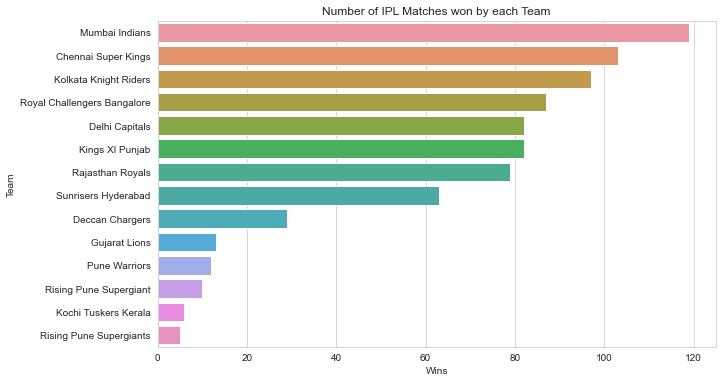

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y='winner', data=data, order=data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL Matches won by each Team')

### Plot a graph to visualise the number of matches played in each stadium

Text(0.5, 1.0, 'Number of matches played in each stadium')

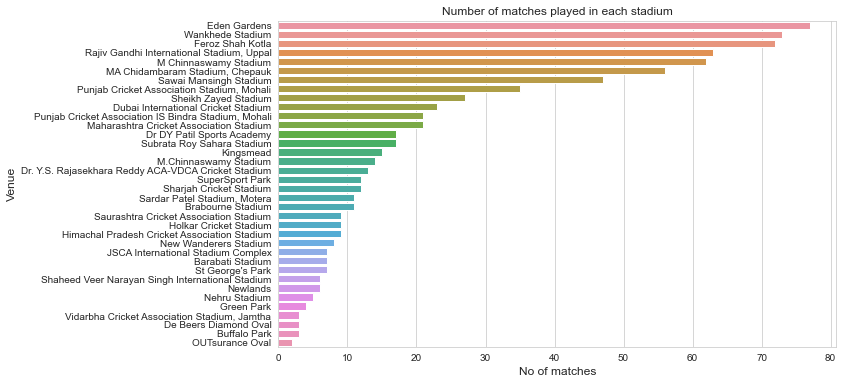

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='venue', data=data, order=data['venue'].value_counts().index)
plt.xlabel('No of matches', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.title('Number of matches played in each stadium')

### Plot a graph to visualise the decisions taken by the teams after winning the toss

Text(0.5, 1.0, 'Toss Decision')

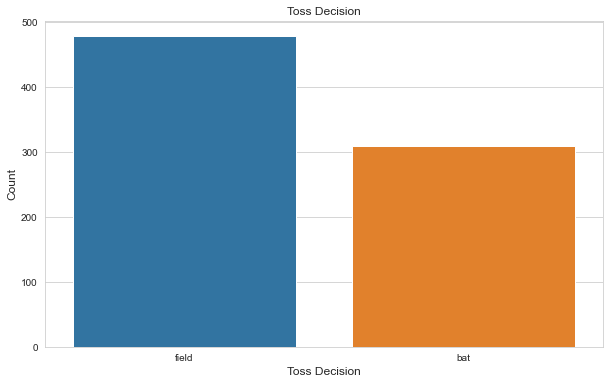

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='toss_decision', data=data)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Toss Decision')

### Finding unique values based on "City", "toss_decision", "Result"

In [20]:
x=['city','toss_decision','result']
for i in x:
    print('-----------')
    print(data[i].unique())
    print(data[i].value_counts())

-----------
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Rajkot' 'Kanpur' 'Bengaluru' 'Sharjah' 'Dubai']
Mumbai            101
Kolkata            77
Delhi              72
Hyderabad          63
Bangalore          62
Chandigarh         56
Chennai            56
Jaipur             47
Pune               38
Abu Dhabi          27
Dubai              23
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Sharjah            12
Ahmedabad          11
Dharamsala          9
Rajkot              9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Raipur              6
Cape Town           6
Kochi               5
Kanpur              4
Nagpur         

In [21]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,4/18/08,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,4/19/08,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/08,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/08,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


### Drop Unnecessary Columns

In [22]:
data.drop(['id','city','date','player_of_match','eliminator','umpire1','umpire2'], axis=1, inplace=True)

In [23]:
data.head()

,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin
0,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0
1,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0
2,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0
3,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0
4,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0


### Seperate Result from the data

In [24]:
X=data.drop(['winner'],axis=1)
Y=data['winner']

In [25]:
X.head()

,venue,neutral_venue,team1,team2,toss_winner,toss_decision,result,result_margin
0,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,runs,140.0
1,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,runs,33.0
2,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,wickets,9.0
3,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,wickets,5.0
4,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,wickets,5.0


### Change Categorical Values to Numerical Values

In [26]:
k=pd.get_dummies(X, ['venue','team1','team2','toss_winner','toss_decision','result'], drop_first=True)

### Add Pre-existing numerical values columns to k

In [27]:
k['result_margin']=X['result_margin']
k['neutral_venue']=X['neutral_venue']

In [28]:
k.head()

,neutral_venue,result_margin,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_wickets
0,0,140.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,33.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9.0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(Y)

### Split the available data in to 80% train and 20% test sets

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(k,Y, train_size=0.8)

# Model Creation and Evaluation

### import Random classifier model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model= RandomForestClassifier(n_estimators=200, min_samples_split=3, max_features="auto")

In [33]:
model.fit(x_train,y_train)

/Users/saikoride/miniconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=200)

In [34]:
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [36]:
print(ac)

0.6012658227848101
